In [3]:
import json

# Load the JSON data from the file
file_path = './results/pt_ep3_trainer_state.json'

# Opening the file and load its contents
with open(file_path, 'r') as file:
    data = json.load(file)

# Extracting the 'log_history' field if it exists
log_history = data.get('log_history', [])

log_history[:5]  # Displaying only the first 5 entries to check the structure


[{'epoch': 0.01,
  'learning_rate': 3.843108934201205e-05,
  'loss': 2.0958,
  'step': 10},
 {'epoch': 0.01, 'learning_rate': 5e-05, 'loss': 1.8031, 'step': 20},
 {'epoch': 0.01,
  'eval_accuracy': 0.47363519785051295,
  'eval_loss': 1.8766186237335205,
  'eval_runtime': 141.6159,
  'eval_samples_per_second': 5.649,
  'eval_steps_per_second': 1.412,
  'step': 20},
 {'epoch': 0.02,
  'learning_rate': 5.6767378909116276e-05,
  'loss': 1.8862,
  'step': 30},
 {'epoch': 0.02,
  'learning_rate': 6.156891065798796e-05,
  'loss': 1.7974,
  'step': 40}]

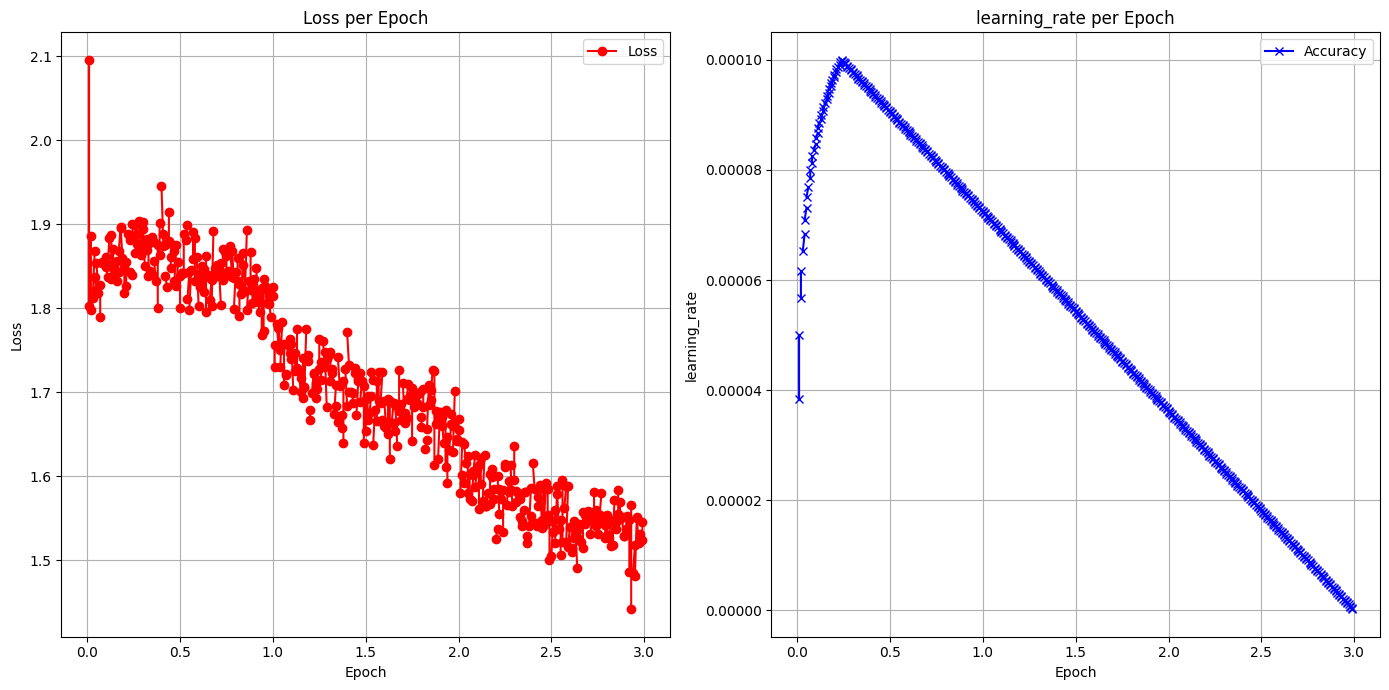

In [8]:
import matplotlib.pyplot as plt

# Prepare lists to hold the data for plotting
epochs = [entry['epoch'] for entry in log_history]
losses = [entry.get('loss', None) for entry in log_history]
learning_rate = [entry.get('learning_rate',None) for entry in log_history]

# Plotting
plt.figure(figsize=(14, 7))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, losses, marker='o', color='red', label='Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# # Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, learning_rate, marker='x', color='blue', label='Accuracy')
plt.title('learning_rate per Epoch')
plt.xlabel('Epoch')
plt.ylabel('learning_rate')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
unique_keys = set()
for entry in log_history:
    unique_keys.update(entry.keys())

# Remove 'epoch' and 'step' from the unique_keys as they are not metrics to be plotted
unique_keys.discard('epoch')
unique_keys.discard('step')

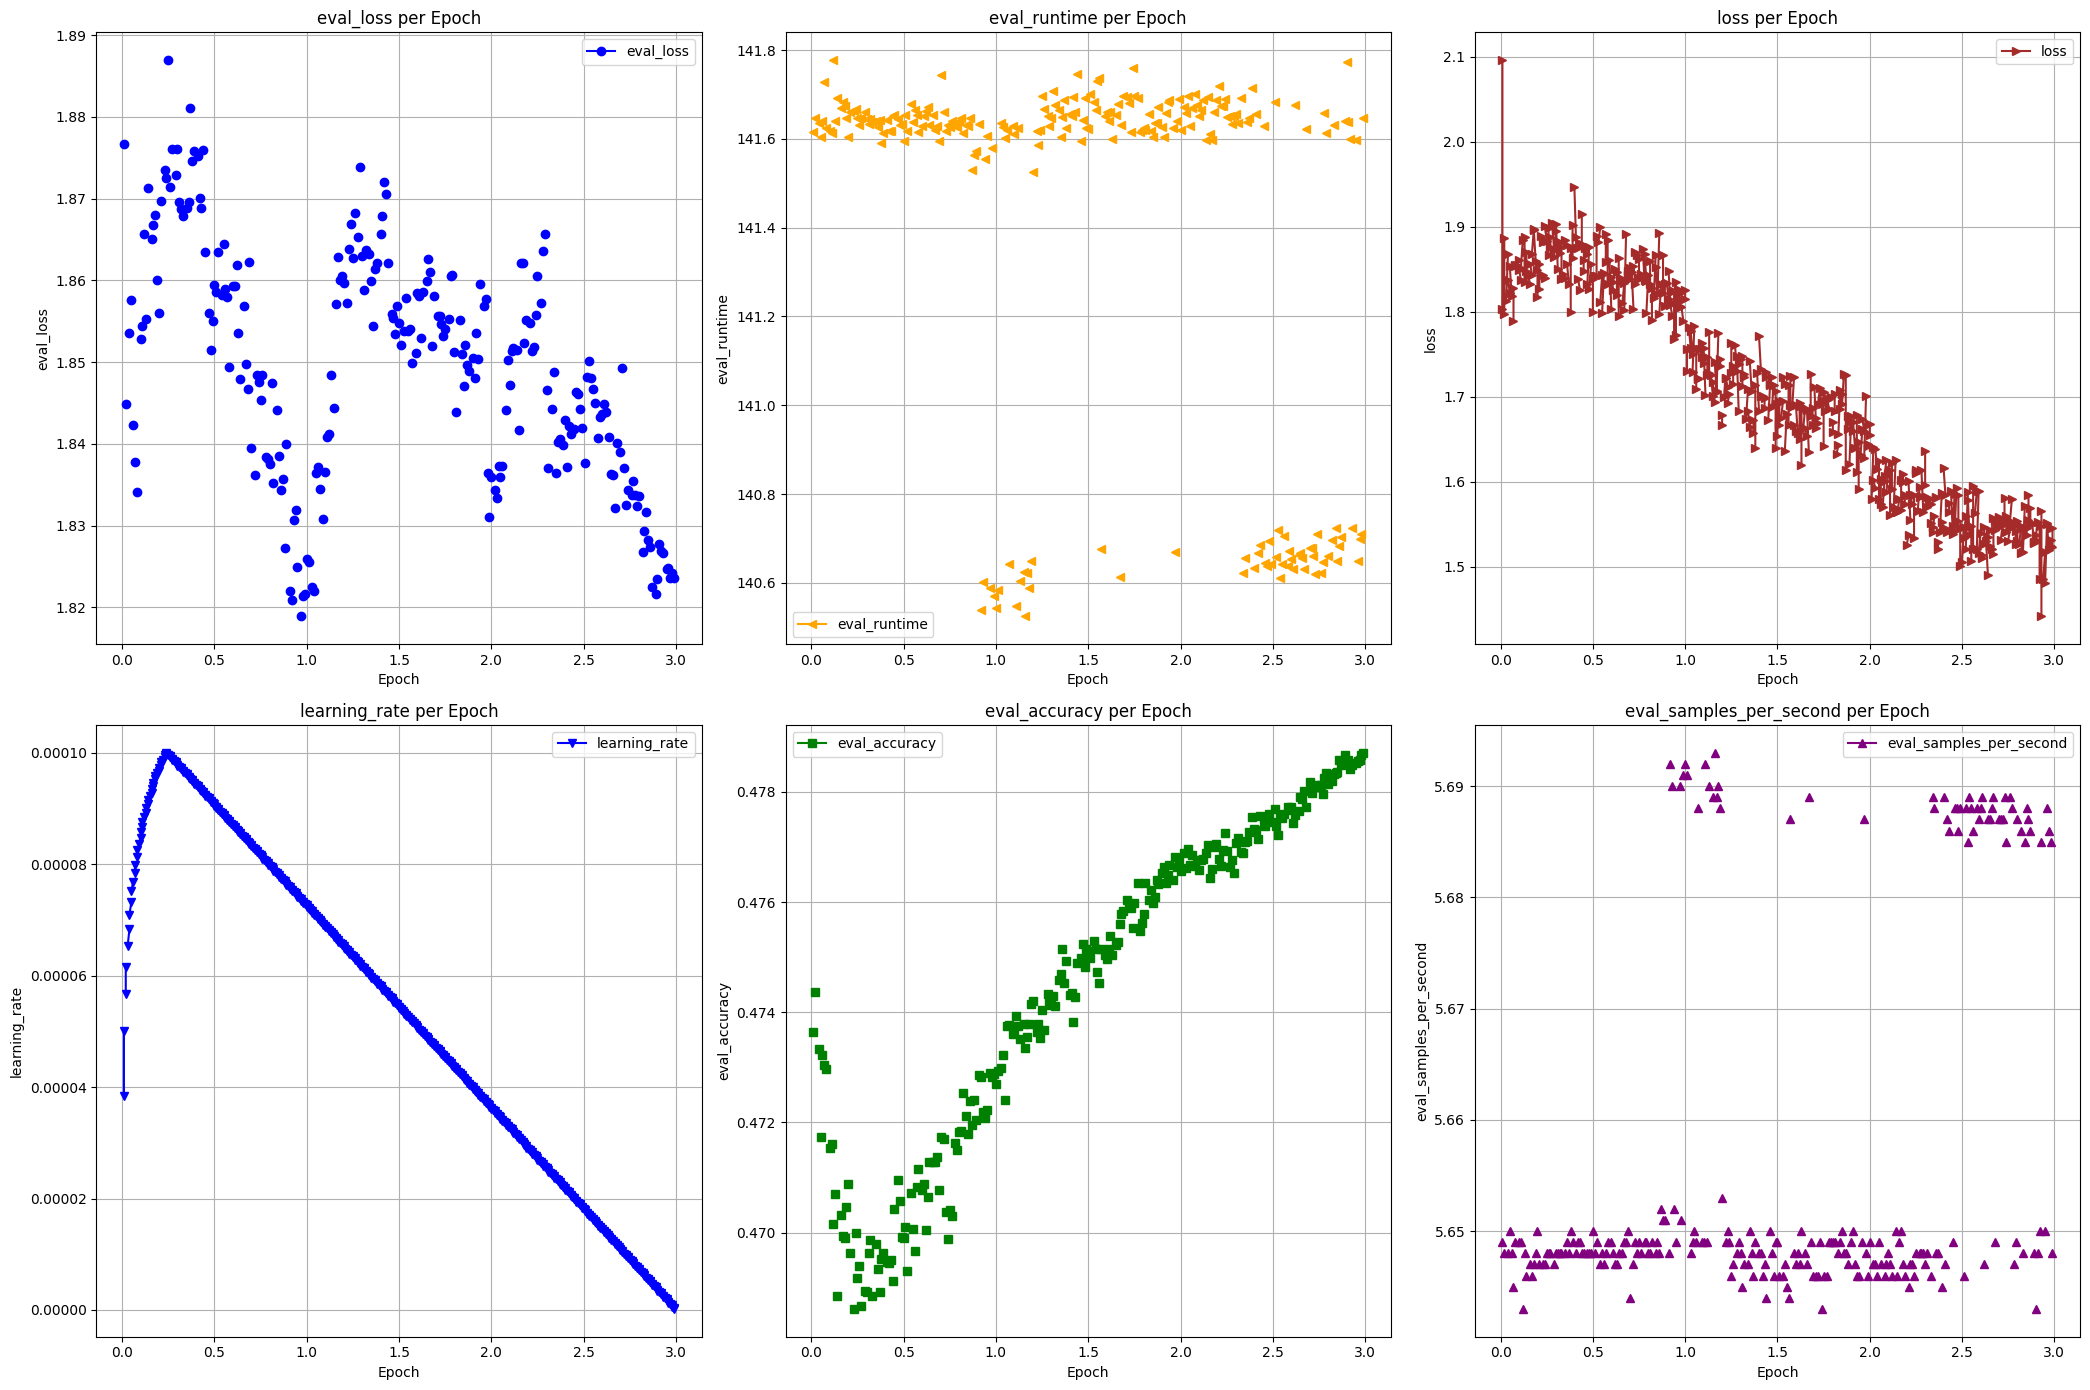

In [27]:
# Define a function to plot a given metric
def plot_metric(metric_key, color, label, marker=None, subplot_index=1):
    metric_values = [entry.get(metric_key, None) for entry in log_history]
    if sum(np.array(metric_values)!=None)==1:
        return 1
    plt.subplot(2, 3, subplot_index)
    plt.plot(epochs, metric_values, marker=marker, color=color, label=label)
    plt.title(f'{label} per Epoch')
    plt.xlabel('Epoch')
    plt.ylabel(label)
    plt.grid(True)
    plt.legend()
    return 0

# Using the defined function to plot various metrics
plt.figure(figsize=(21, 14))

# Plotting all the metrics as per the user's request
tmp=0
for i, key in enumerate(unique_keys):
    if i-tmp==6:
        break
    if plot_metric(key, color=colors[i%len(colors)],label=key.replace('/', ' '), marker=markers[i%len(markers)], subplot_index=i+1-tmp):
        tmp+=1
    

plt.tight_layout()
plt.show()


251
1
1
1
251
502
502
1
251
251
251
1


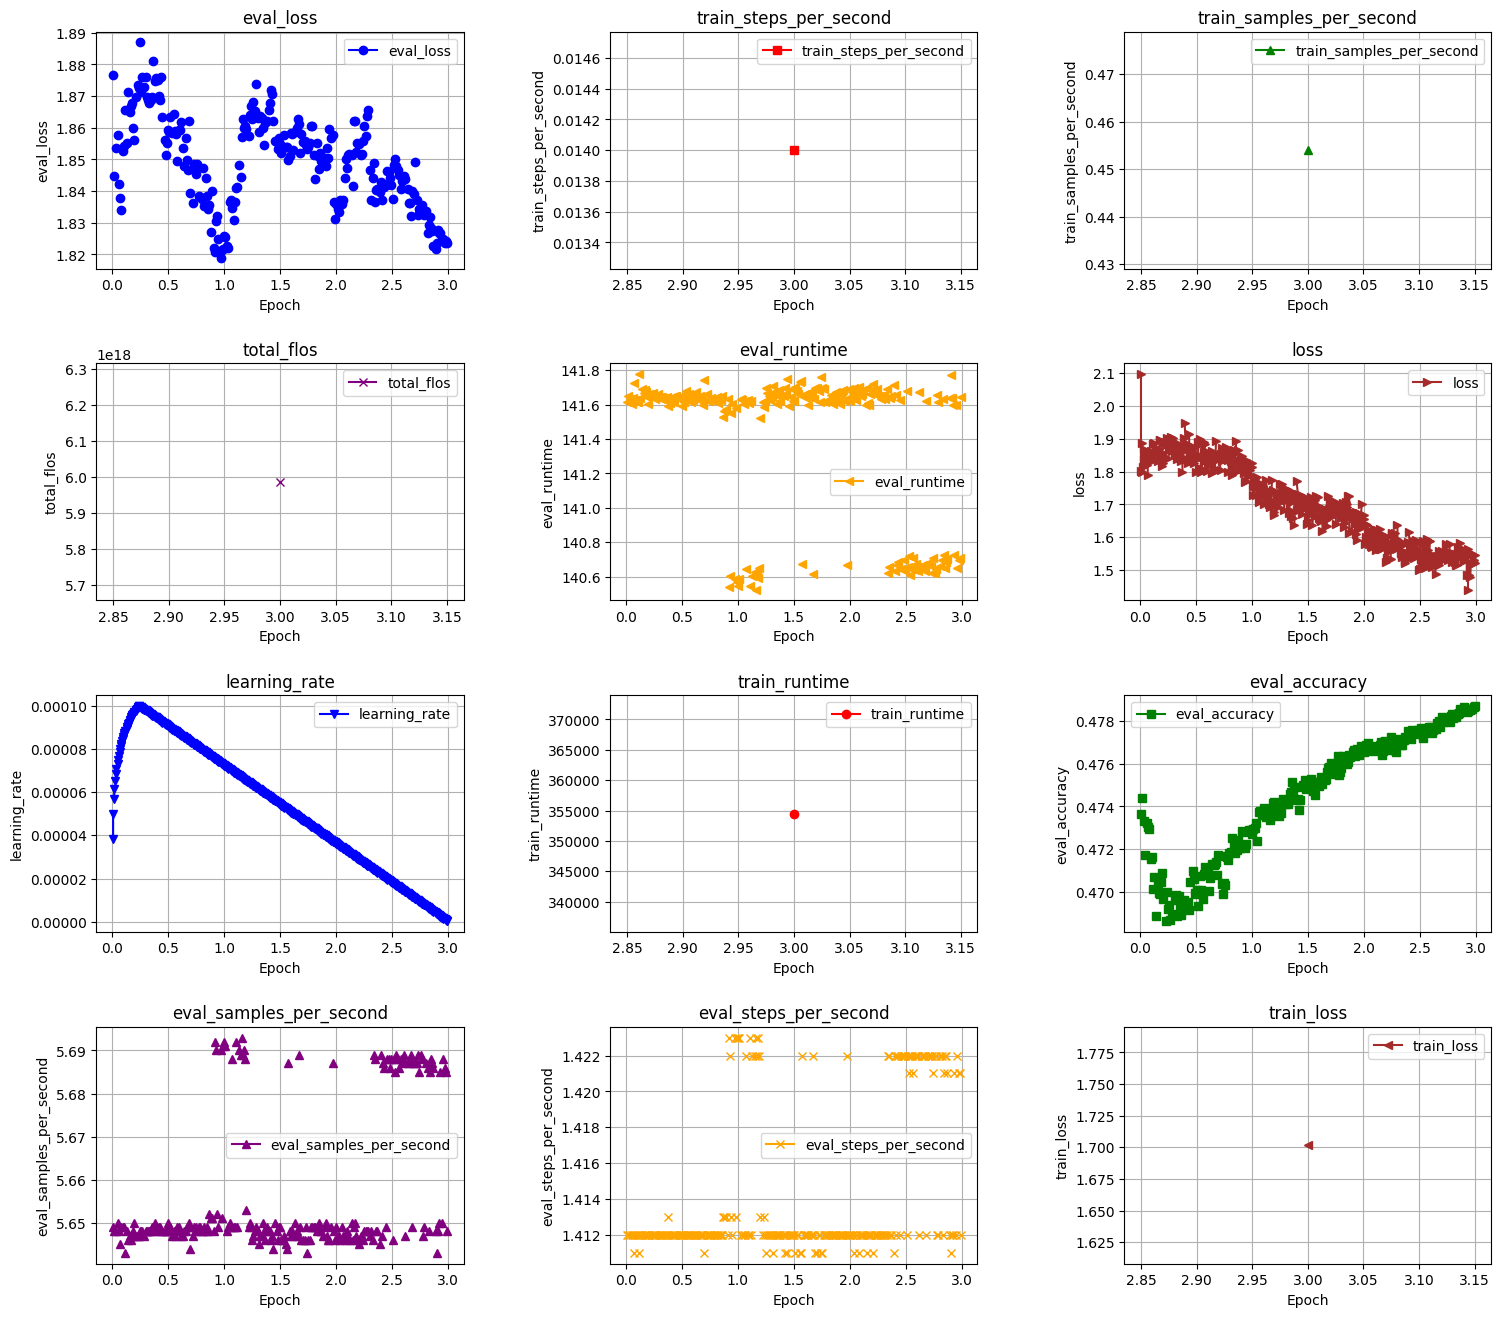

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_metrics(unique_keys, log_history, markers=None, colors=None):
    num_metrics = len(unique_keys)
    cols = 3  # Define the number of columns in the subplot
    rows = num_metrics // cols + (num_metrics % cols > 0)  # Calculate the required number of rows
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 4))  # Adjust the size dynamically
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust the space between plots
    
    if markers is None:
        markers = ['o'] * num_metrics  # Default marker is 'o' for all metrics
    if colors is None:
        colors = ['blue'] * num_metrics  # Default color is 'blue' for all metrics

    for i, key in enumerate(unique_keys):
        ax = axes[i // cols, i % cols]  # Identify the subplot location
        values = [entry.get(key, None) for entry in log_history]  # Extract values for the key
        print(sum(np.array(values)!=None))
        ax.plot(epochs, values, label=key.replace('/', ' '), marker=markers[i%len(markers)], color=colors[i%len(colors)])
        ax.set_title(key)
        ax.set_xlabel('Epoch')
        ax.set_ylabel(key.split('/')[-1])
        ax.legend()
        ax.grid(True)

    # If the number of unique keys is not a multiple of the number of columns, hide the remaining axes
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j // cols, j % cols])
    
    plt.show()

# Example usage:
markers = ['o', 's', '^','x','<','>','v']  # Set markers for each metric
colors = ['blue', 'red', 'green','purple','orange','brown']  # Set colors for each metric
plot_all_metrics(unique_keys, log_history, markers=markers, colors=colors)
